Si analizzerà il dataset "Fake Job Prediction" che, come suggerisce il titolo, presenta tweets inerenti ad
annunci di lavoro classificati come veritieri o meno.

Per prima cosa, si carica il dataset da analizzare:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("./fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Da uno sguardo all'inizio del set di dati, troviamo le seguenti funzionalità:

job_id: intuitivamente, questo è solo l'ID univoco per ogni singola voce nel set di dati;

title: il titolo dell'annuncio;

location: la posizione del lavoro nel formato: Paese, Stato, Città;

dipartment: indica il dipartimento aziendale in cui inserire la figura richiesta;

salary_range: l'intervallo salariale per la posizione;

company_profile: una panoramica dell'azienda;

description: una panoramica della descrizione del lavoro;

requirements: una panoramica dei requisiti necessari;

benefits: una panoramica dei vantaggi offerti da questo lavoro / azienda;

telecommuting: se questo lavoro è telecommuting (1) o meno (0);

has_company_logo: se questo annuncio di lavoro ha o meno il logo dell'azienda;

has_questions: se questo annuncio di lavoro ha un questionario in allegato;

employment_type: se questo lavoro è part-time, full-time, ecc;

required_experience: esperienza richiesta;

required_education: quale grado d'istruzione è necessario;

industry: settore lavorativo: moda, informatica, ecc;

function: keyword riassuntiva della posizione lavorativa;

fraudolent: etichetta target, 0 se posto di lavoro reale, 1 se posto di lavoro falso.


In [2]:
print(df.shape)

(17880, 18)


Il dataset è composto da 17880 righe contenenti 18 attributi per riga.

Per prima cosa si valuta la loro consistenza, controllando il quantitativo di valori nulli 
per ogni colonna.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


Questa analisi porta ad escludere, oltre alla colonna job_id ridondante, gli attributi department e salary_range che presentano pochi valori diversi da null e quindi non utili allo studio in oggetto.
Inoltre, la tabella industry è ridondante rispetto all'attributo function.

In [143]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


La funzione describe() non è molto utile in questo caso, essendo la maggior parte delle info di tipo testuale e i
valori restanti, elencati dal metodo, indicano valori booleani.

Si divide la tabella in due DataFrame, in modo da semplificare le operazioni successive. Nella prima vengono inseriti i dati contenenti informazioni testuali più complesse;

In [128]:
df1 = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
df1 = df1.fillna("None")
df2 = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "function","fraudulent"]]
df2 = df2.fillna("None")

In [129]:
df1.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


I restanti valori, formeanno la seconda tabella. Si noti che per la colonna target fraudulent, è presente in ambo le tabelle.

In [130]:
df2.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
0,0,1,0,Other,Internship,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Customer Service,0
2,0,1,0,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0


Si analizza il quantitativo di Tweet identificati come veri o falsi:

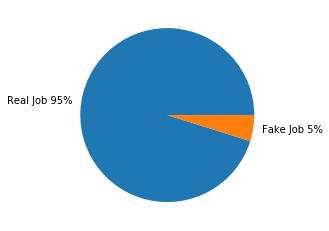

In [131]:
pie=df1["fraudulent"].value_counts()
real=np.round((pie[0]/len(df1["fraudulent"]))*100).astype(int)
fake=np.round((pie[1]/len(df1["fraudulent"]))*100).astype(int)
labels=["Real Job "+str(real)+"%","Fake Job "+str(fake)+"%"]
plt.pie(pie, labels=labels)
plt.show()

Come si può notare il dataset è sbilanciato, presentando il 95% di annunci veritieri e solo il 5% di annunci falsi.
Questa informazione è di grande rilevanza per le analisi successive.

Si analizza più nel dettaglio la prima tabella creata:

In [185]:
def parole(i,j):
     return df1[df1["fraudulent"]==i][j].str.split().map(lambda x: len(x))

def istogrammi(j):
    fig,(hist1,hist2)= plt.subplots(ncols=2, figsize=(20, 5), dpi=200)
    p1=parole(0,j)
    p2=parole(1,j)
    hist1.hist(p1,color='blue')
    hist2.hist(p2,color='orange')
    hist1.set_title('Real')
    hist2.set_title('Fake')
    plt.show()
    

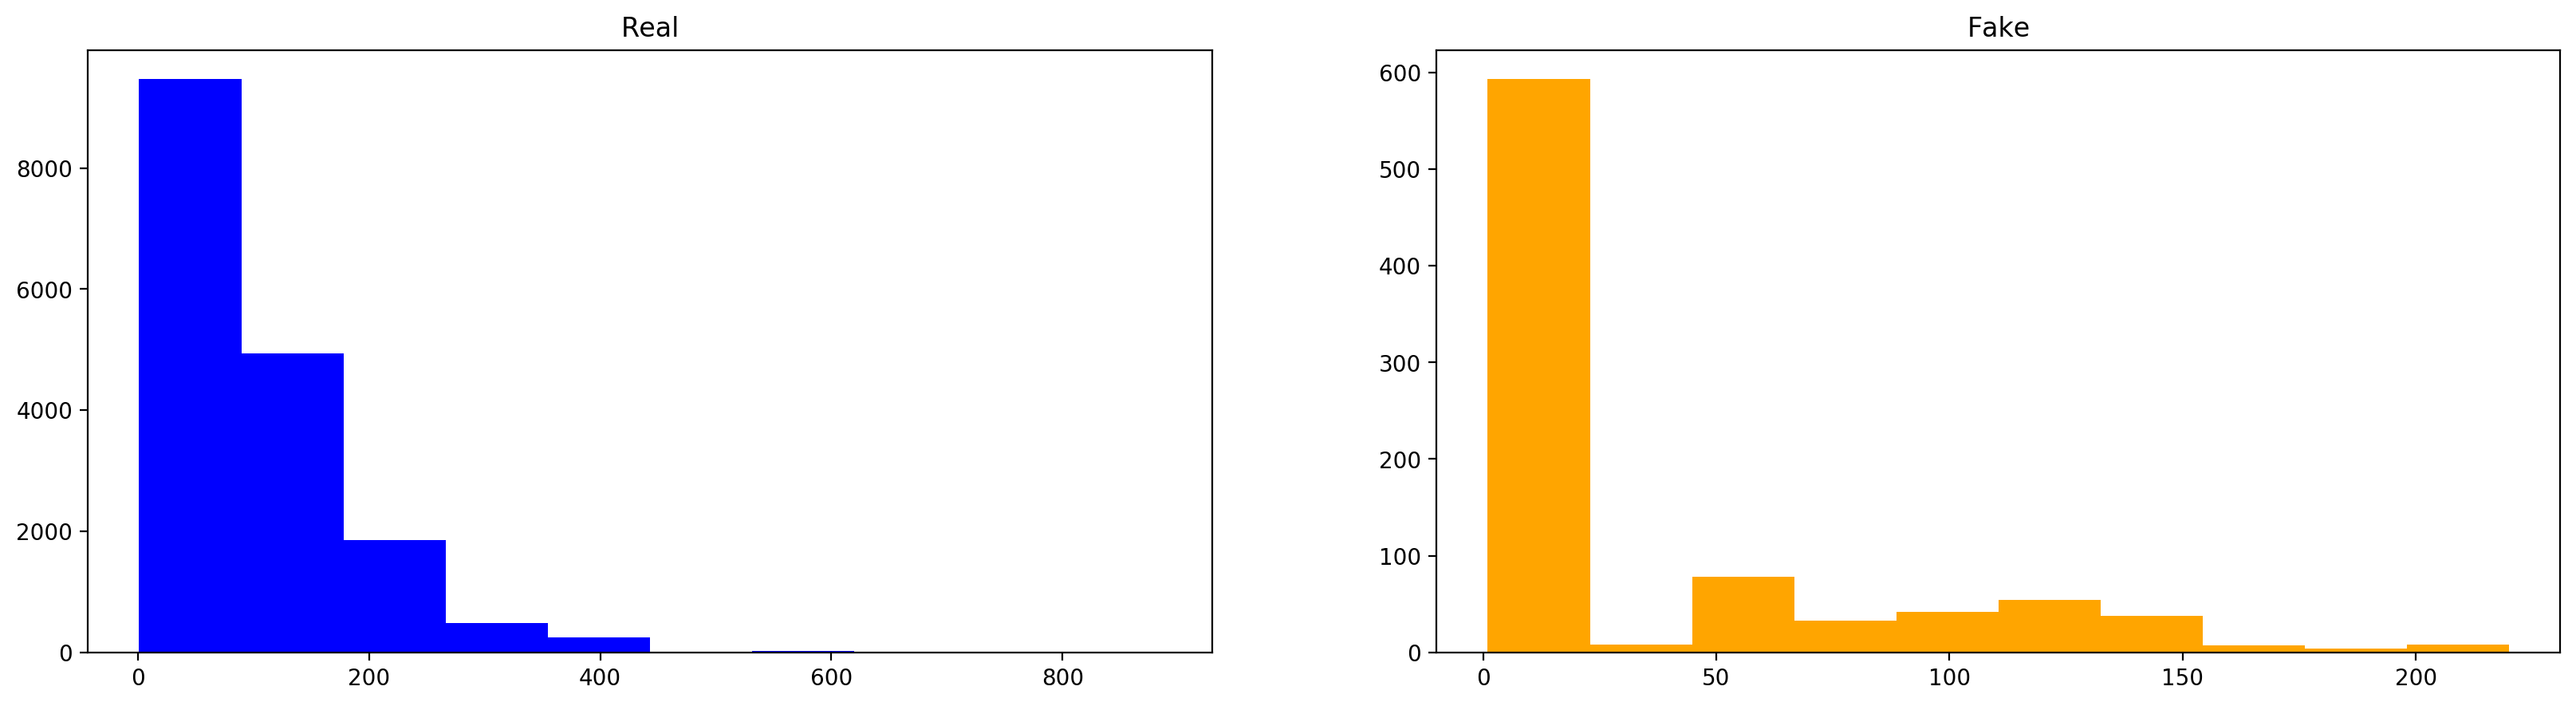

In [186]:
istogrammi('company_profile')

Si noti che il numero di parole contenute nella descrizione aziendale è di gran lunga inferiore nei post falsi, in quanto nella maggior parte di essi si ha un upper bound di 600 parole, circa un decimo di quello medio inerente agli annunci reali.

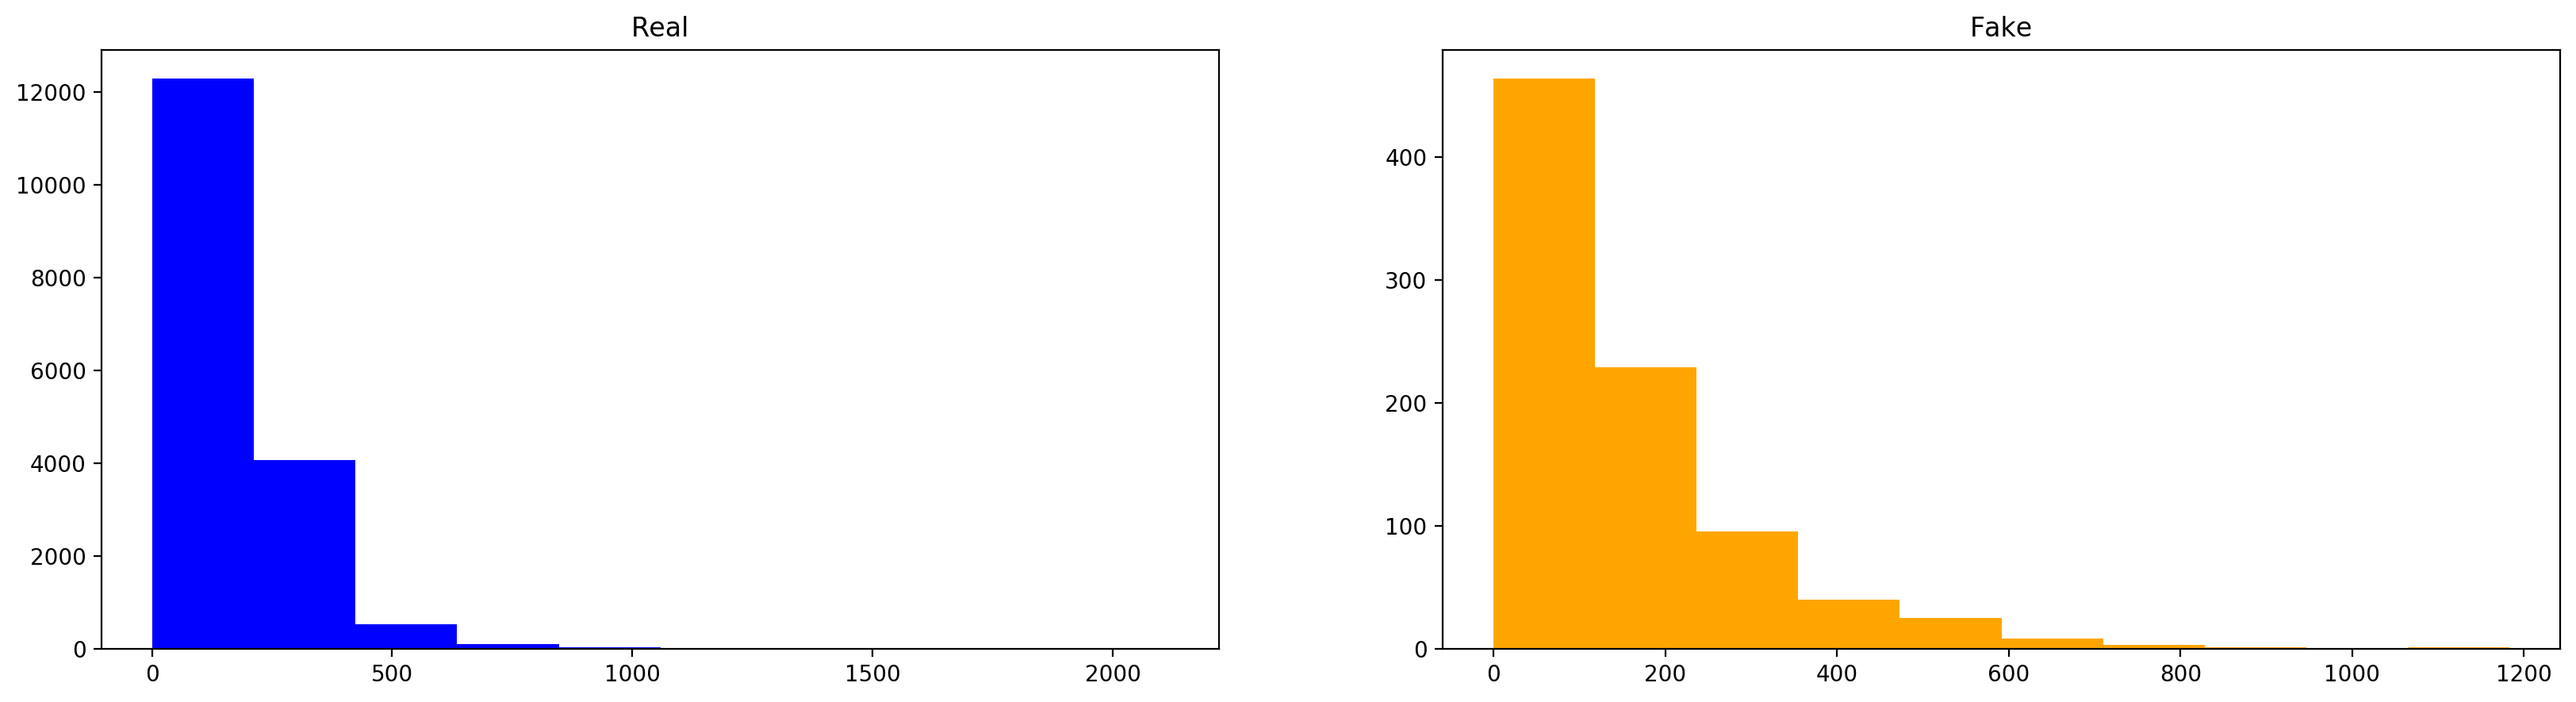

In [187]:
istogrammi('description')

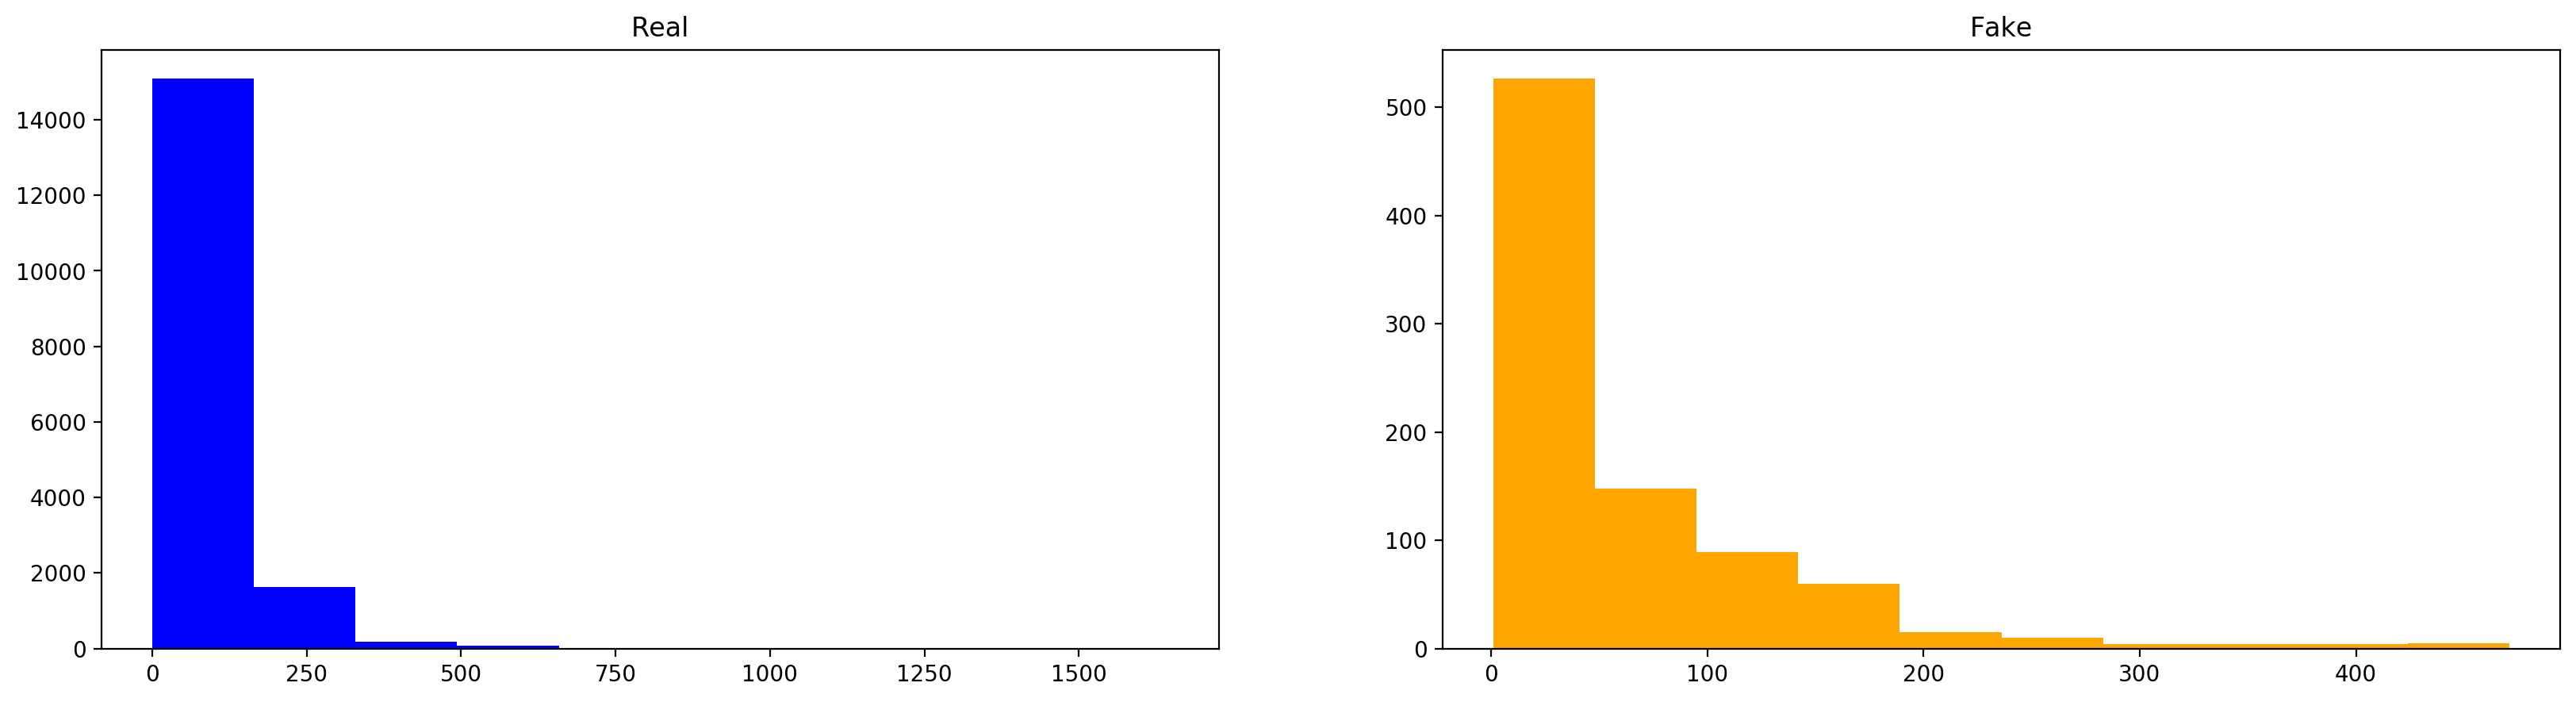

In [188]:
istogrammi('requirements')

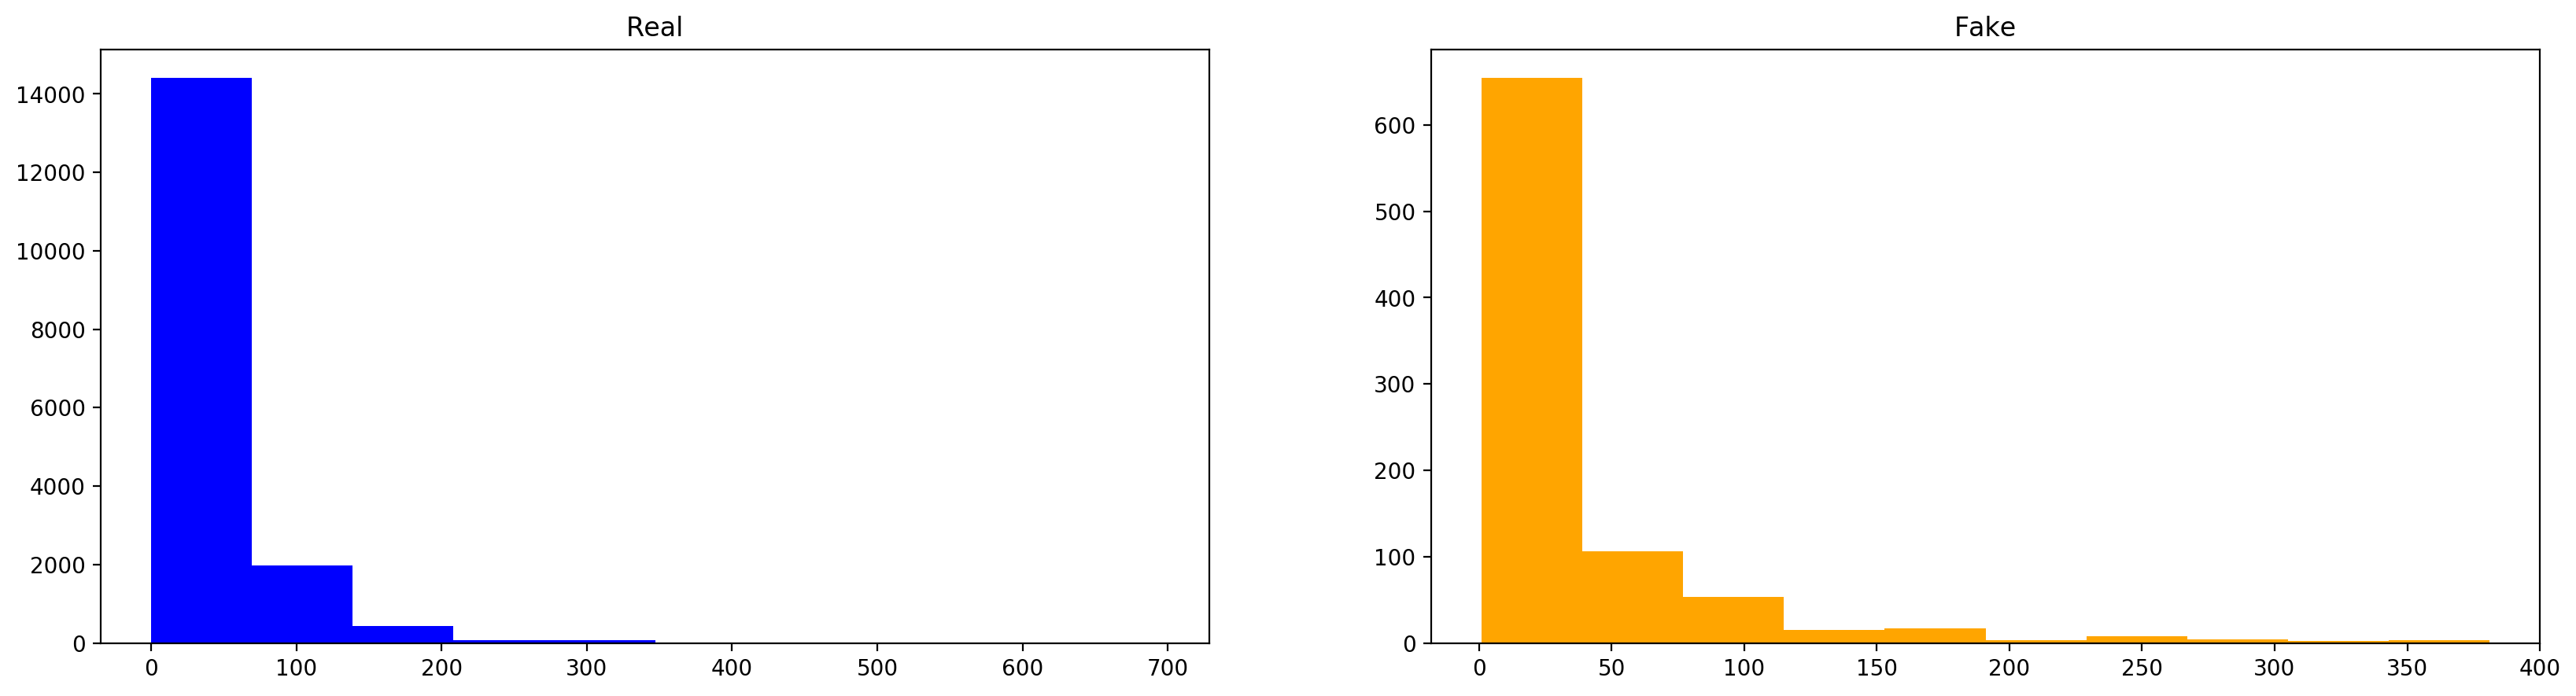

In [189]:
istogrammi('benefits')

Un discorso analogo si riflette anche nei restanti istogrammi, ricavando che i tweet fraudolenti risultano di gran lunga più sintetici. Si può concludere che questa tipologia sia abbastanza vaga in termini di contenuti, non potendo entrare nel dettaglio di un qualcosa che non esiste.

Si analizza ora più nel dettaglio il contenuto della seconda tabella:

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 

def tabella(vector):
    tab=df2.drop(df2.columns[vector], axis='columns')
    grid = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
    plt.figure(figsize=(15,25)) 
    for i,j in enumerate(tab): 
        ax = plt.subplot(grid[i]) 
        sns.countplot(x=j, data=df2, hue='fraudulent', order=df2[j].value_counts().iloc[:5].index) 
        ax.set_ylabel(" ")
        ax.set_xlabel(" ")
        ax.set_title(j) 
        xlabels = ax.get_xticklabels() 
        ax.set_xticklabels(xlabels,  fontsize=10)
        plt.legend(fontsize=8)
        plt.xticks(rotation=30) 
        total = len(tab)
        sizes=[] 
        for p in ax.patches: 
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=10)
    plt.show()     

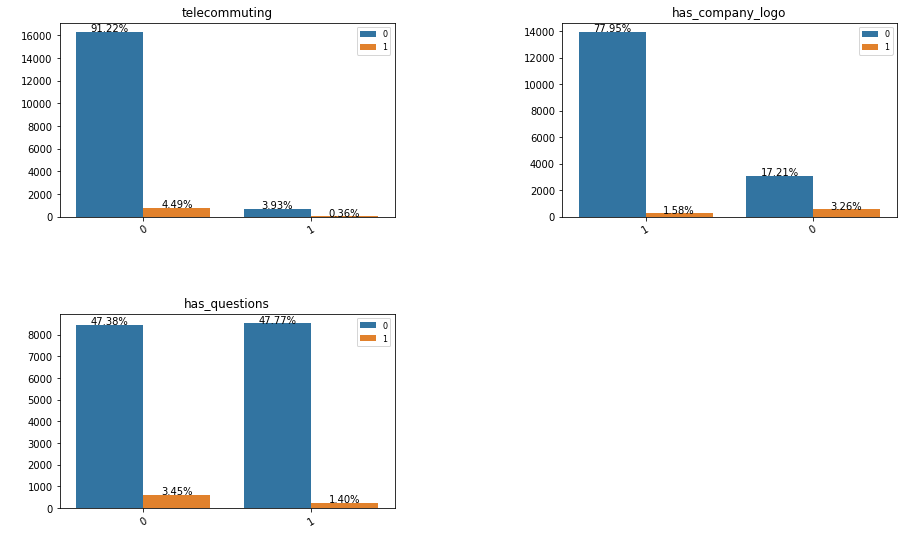

In [137]:
tabella([3,4,5,6,7])#si passano gli indici delle colonne da escludere 

Analizzando la prima tabella si intuisce come la quasi totalità degli annunci, sia fraudolenti che veri, offre 
lavoro con accesso tramite mezzi multimediali, rendendo questa tabella non molto rilevante.

La seconda tabella mostra la presenza di un logo aziendale in circa l'80% di annunci veritieri.
La cosa interessante,però, è che circa i 2/3 delle inserzioni false non presenta logo rendendolo, con elevata probabilità, un fattore discriminante ai fini analitici.

La terza tabella non è molto utile in quanto la metà degli annunci veritieri presenta un questionario e la metà no; mentre per quanto concerne gli annunci fraudolenti,i 2/3 presentano un questionario mentre la restante parte no.
Tuttavia, non si può trarre molto da questa info.

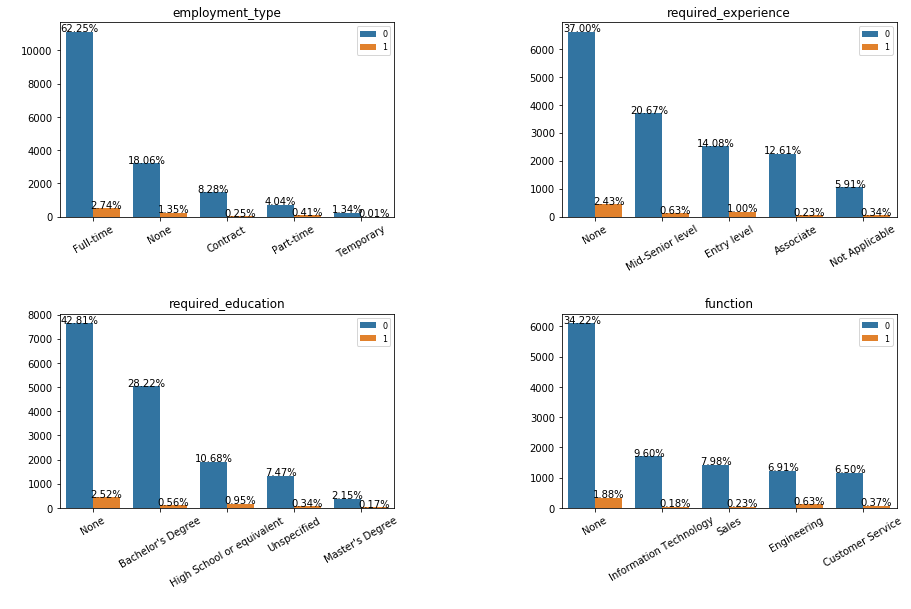

In [142]:
tabella([0,1,2,7])#si escude la colonna industry in quanto è ridondante a function

Dalla prima tabella si evince che la maggioranza degli annunci veritieri, così come quelli fraudolenti, offre posizioni di lavoro a tempo indeterminato.

Dalla seconda e dalla terza tabella si evince che gli annunci fraudolenti,così come quelli veritieri, non richiedono esperienza e grado di istruzione specifici.

L'ultima tabella mostra che circa il 34% di annunci reali non specifica la posizione lavorativa ricercata, per i fraudolenti non si traggono info rilevanti.

Si noti che la maggior parte degli annunci fraudolenti cerca di ingannare i lettori cercando di avviinarsi il più 
possibile alla conformazione media di un annuncio veritiero.